# Coding Temple's Data Analytics Program:
---
## Python for DA: Machine Learning Assignment

For your assignment today, you will look through the [UCI Irvine ML Repository](https://archive.ics.uci.edu/datasets) to find a dataset that you can build a model on. Your workflow should look something like:

- Import any necessary libraries
- Load in the data
- Clean/Tidy the Data
- Explore the data:
    - Gather all summary statistics
    - Visualize your data and your target
    - Identify any relationships between your target and the feature matrix
    - Loop back through and continue cleaning data/feature engineering as needed
- Split the data
- Establish a baseline model
- Create model
- Establish model accuracy
- Hypertune your model
- Communicate your results

The model, data, and methods you use are all completely up to you for this assignment! Ensure you label your notebook with markdown cells and proper comments

In [12]:
from category_encoders import OneHotEncoder, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, roc_auc_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier, XGBRegressor

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
col_names = ['winery','alcohol','malic_acid','ash','alcalinity_of_ash','magnesium','total_phenols','falvonoids','nonflavonoid_phenols','proanthicyanins','color_intensity','hue','od280/od315_of_diluted_wines','proline']
df = pd.read_csv(r'C:\Users\User\Documents\Bonfire\Week4\Day5\wine.data', names=col_names)
df.isna().sum()

winery                          0
alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
falvonoids                      0
nonflavonoid_phenols            0
proanthicyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

### seeing the realtion of target and rest of the variables


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


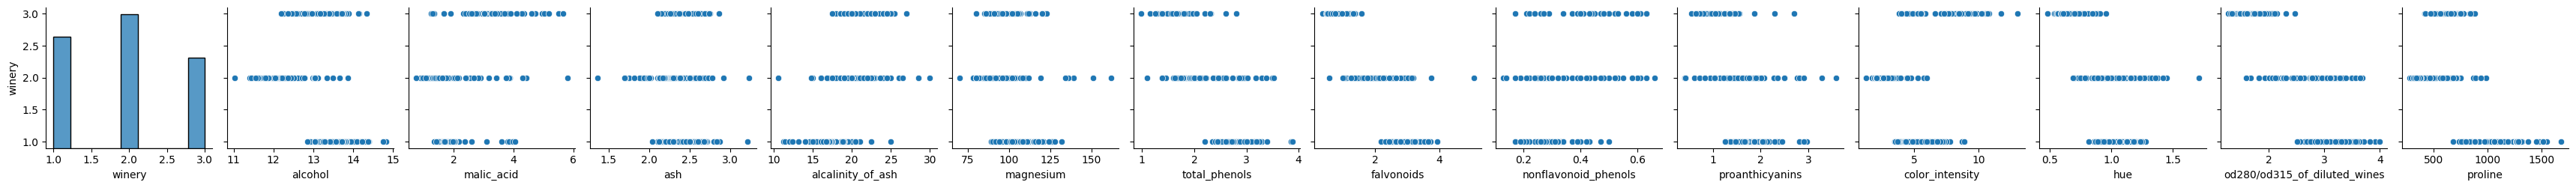

In [10]:
sns.pairplot(df, y_vars=['winery'])


### splitting the data into train and test sets

In [30]:
target = 'winery'
x = df.drop(columns = target)
y= df[target]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
display(x_test)
print(y_test)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,falvonoids,nonflavonoid_phenols,proanthicyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
19,13.64,3.10,2.56,15.2,116,2.70,3.03,0.17,1.66,5.100000,0.96,3.36,845
45,14.21,4.04,2.44,18.9,111,2.85,2.65,0.30,1.25,5.240000,0.87,3.33,1080
140,12.93,2.81,2.70,21.0,96,1.54,0.50,0.53,0.75,4.600000,0.77,2.31,600
30,13.73,1.50,2.70,22.5,101,3.00,3.25,0.29,2.38,5.700000,1.19,2.71,1285
67,12.37,1.17,1.92,19.6,78,2.11,2.00,0.27,1.04,4.680000,1.12,3.48,510
16,14.30,1.92,2.72,20.0,120,2.80,3.14,0.33,1.97,6.200000,1.07,2.65,1280
119,12.00,3.43,2.00,19.0,87,2.00,1.64,0.37,1.87,1.280000,0.93,3.05,564
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.300000,0.70,1.56,750
109,11.61,1.35,2.70,20.0,94,2.74,2.92,0.29,2.49,2.650000,0.96,3.26,680
141,13.36,2.56,2.35,20.0,89,1.40,0.50,0.37,0.64,5.600000,0.70,2.47,780


19     1
45     1
140    3
30     1
67     2
16     1
119    2
174    3
109    2
141    3
24     1
150    3
41     1
118    2
15     1
111    2
113    2
82     2
9      1
114    2
18     1
66     2
60     2
169    3
171    3
164    3
117    2
65     2
90     2
55     1
29     1
128    2
145    3
31     1
12     1
42     1
Name: winery, dtype: int64


### establishing a baseline


In [31]:
baseline = [round(df.winery.mean())]* len (df)
baseline

[2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

### creating a pipline and fitting it to a model


In [36]:
model_dt = make_pipeline(LogisticRegression(random_state=42))
model_dt.fit(x_train, y_train)


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('logisticregression', LogisticRegression(random_state=42))])

### Checking the metricks of the model

In [37]:
print('decisiton tree scores:')
print(mean_absolute_error(y_train,model_dt.predict(x_train)))
print(mean_absolute_error(y_test,model_dt.predict(x_test)))

decisiton tree scores:
0.035211267605633804
0.027777777777777776


In [38]:
print('Mean squared error:')
print(mean_squared_error(y_train,model_dt.predict(x_train)))
print(mean_squared_error(y_test,model_dt.predict(x_test)))

Mean squared error:
0.035211267605633804
0.027777777777777776


In [39]:
print('R squared score: ')
print(r2_score(y_train, model_dt.predict(x_train)))
print(r2_score(y_test, model_dt.predict(x_test)))

R squared score: 
0.9410543794105438
0.9523809523809523


### hypertuning the model

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}
grid_search = GridSearchCV(LogisticRegression(max_iter=2000, random_state=42), param_grid, cv=5)
grid_search.fit(x_train, y_train)
best_model = grid_search.best_estimator_
best_preds = best_model.predict(x_test)
best_accuracy = accuracy_score(y_test, best_preds)
print(f"Best Model Accuracy: {best_accuracy:.2f}")


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_

Best Model Accuracy: 1.00


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


### communicating results


In [45]:
print("Baseline Model:")
print(f"- Accuracy: {accuracy_score(y_test, model_dt.predict(x_test)):.2f}")

print("\nBest Model:")
print(f"- Accuracy: {best_accuracy:.2f}")
print(f"- Best Parameters: {grid_search.best_params_}")

Baseline Model:
- Accuracy: 0.97

Best Model:
- Accuracy: 1.00
- Best Parameters: {'C': 1, 'solver': 'newton-cg'}
